In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from thesis_tools.utils.data import read_billionaires_data, read_bloomberg_data
from thesis_tools.utils.latex import dataframe_to_latex_table

In [2]:
df_bloomberg = read_bloomberg_data()

In [3]:
df_bloomberg

,rank,net_worth,full_name,country,region,log_net_worth
0,1.0,188.00,Jeff Bezos,United States,North America,5.236442
1,2.0,170.00,Elon Musk,United States,North America,5.135798
2,3.0,155.00,Bernard Arnault,France,Europe,5.043425
3,4.0,144.00,Bill Gates,United States,North America,4.969813
4,5.0,114.00,Mark Zuckerberg,United States,North America,4.736198
...,...,...,...,...,...,...
494,496.0,5.75,Lino Saputo,Canada,North America,1.749200
495,497.0,5.74,Prajogo Pangestu,Indonesia,East Asia,1.747459
496,498.0,5.74,Charles Dolan & Family,United States,North America,1.747459
497,499.0,5.72,Vladimir Kim,Kazakhstan,Central Eurasia,1.743969


In [4]:
df = df_bloomberg.copy()

# Assuming df is your dataframe
# Group by 'region' and 'year' to get the number of billionaires per region per year
grouped = df.groupby(['region']).agg(
    num_billionaires=('full_name', 'count'),
    avg_net_worth=('net_worth', 'mean'),
    avg_log_net_worth=('log_net_worth', 'mean')
).reset_index()

# Group by 'region' to calculate the required statistics
summary_df = grouped.groupby('region').agg(
    num_billionaires=('num_billionaires', 'mean'),
    avg_net_worth=('avg_net_worth', 'mean'),
    avg_log_net_worth=('avg_log_net_worth', 'mean')
).reset_index()

# Set the region as the index
summary_df.set_index('region', inplace=True)

summary_df


,num_billionaires,avg_net_worth,avg_log_net_worth
region,,,
Central Eurasia,28.0,14.116429,2.502753
China,95.0,15.472526,2.555326
East Asia,39.0,12.985897,2.390150
Europe,112.0,13.702500,2.342080
India,17.0,19.934706,2.690042
Middle East,8.0,8.805000,2.118882
North America,170.0,19.563824,2.519291
Rest of World,15.0,13.922667,2.331542
South America,14.0,16.615714,2.625881


In [5]:
dataframe_to_latex_table(
    summary_df,
    caption='Summary statistics of the Bloomberg dataset',
    label='tab:bloomberg_summary',
    n_decimals=1
)

\begin{table}
\caption{Summary statistics of the Bloomberg dataset}
\label{tab:bloomberg_summary}
\begin{tabular}{lrrr}
\toprule
 & num\_billionaires & avg\_net\_worth & avg\_log\_net\_worth \\
region &  &  &  \\
\midrule
Central Eurasia & 28.0 & 14.1 & 2.5 \\
China & 95.0 & 15.5 & 2.6 \\
East Asia & 39.0 & 13.0 & 2.4 \\
Europe & 112.0 & 13.7 & 2.3 \\
India & 17.0 & 19.9 & 2.7 \\
Middle East & 8.0 & 8.8 & 2.1 \\
North America & 170.0 & 19.6 & 2.5 \\
Rest of World & 15.0 & 13.9 & 2.3 \\
South America & 14.0 & 16.6 & 2.6 \\
\bottomrule
\end{tabular}
\end{table}



## Comparison to Forbes

In [6]:
df_forbes = read_billionaires_data(
    only_years = ['2021']
)

In [7]:
df_forbes

,year,rank,net_worth,full_name,self_made,country_of_citizenship,region,log_net_worth
0,2021-01-01,1,177.0,Jeff Bezos,True,United States,North America,5.176150
1,2021-01-01,2,151.0,Elon Musk,True,United States,North America,5.017280
2,2021-01-01,3,150.0,Bernard Arnault & family,False,France,Europe,5.010635
3,2021-01-01,4,124.0,Bill Gates,True,United States,North America,4.820282
4,2021-01-01,5,97.0,Mark Zuckerberg,True,United States,North America,4.574711
...,...,...,...,...,...,...,...,...
2750,2021-01-01,2674,1.0,Daniel Yong Zhang,True,China,China,0.000000
2751,2021-01-01,2674,1.0,Zhang Yuqiang,True,China,China,0.000000
2752,2021-01-01,2674,1.0,Zhao Meiguang,True,China,China,0.000000
2753,2021-01-01,2674,1.0,Zhong Naixiong,True,China,China,0.000000


In [8]:
# Make a new dataframe matched on the name of the person
# Make the suffixes forbes and bloomberg
df_merged = pd.merge(
    df_forbes,
    df_bloomberg,
    on='full_name',
    how='inner',
    suffixes=('_forbes', '_bloomberg')
)

In [9]:
df_merged

,year,rank_forbes,net_worth_forbes,full_name,self_made,country_of_citizenship,region_forbes,log_net_worth_forbes,rank_bloomberg,net_worth_bloomberg,country,region_bloomberg,log_net_worth_bloomberg
0,2021-01-01,1,177.0,Jeff Bezos,True,United States,North America,5.176150,1.0,188.00,United States,North America,5.236442
1,2021-01-01,2,151.0,Elon Musk,True,United States,North America,5.017280,2.0,170.00,United States,North America,5.135798
2,2021-01-01,4,124.0,Bill Gates,True,United States,North America,4.820282,4.0,144.00,United States,North America,4.969813
3,2021-01-01,5,97.0,Mark Zuckerberg,True,United States,North America,4.574711,5.0,114.00,United States,North America,4.736198
4,2021-01-01,6,96.0,Warren Buffett,True,United States,North America,4.564348,6.0,108.00,United States,North America,4.682131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2021-01-01,1931,1.6,Jean-Pierre Cayard,False,France,Europe,0.470004,436.0,6.35,France,Europe,1.848455
317,2021-01-01,2035,1.5,Raymond Kwok,False,Hong Kong,China,0.405465,166.0,12.60,Hong Kong,China,2.533697
318,2021-01-01,2263,1.3,Vivien Chen,False,Hong Kong,China,0.262364,482.0,5.88,Hong Kong,China,1.771557
319,2021-01-01,2378,1.2,Henry Cheng,False,Hong Kong,China,0.182322,76.0,23.10,Hong Kong,China,3.139833


In [10]:
df_merged['log_forbes_minus_log_bloomberg'] = df_merged['log_net_worth_forbes'] - df_merged['log_net_worth_bloomberg']

In [11]:
df_merged['log_forbes_minus_log_bloomberg'].describe()

count    321.000000
mean      -0.152687
std        0.418260
min       -2.957511
25%       -0.274437
50%       -0.105361
75%        0.070452
max        0.813106
Name: log_forbes_minus_log_bloomberg, dtype: float64

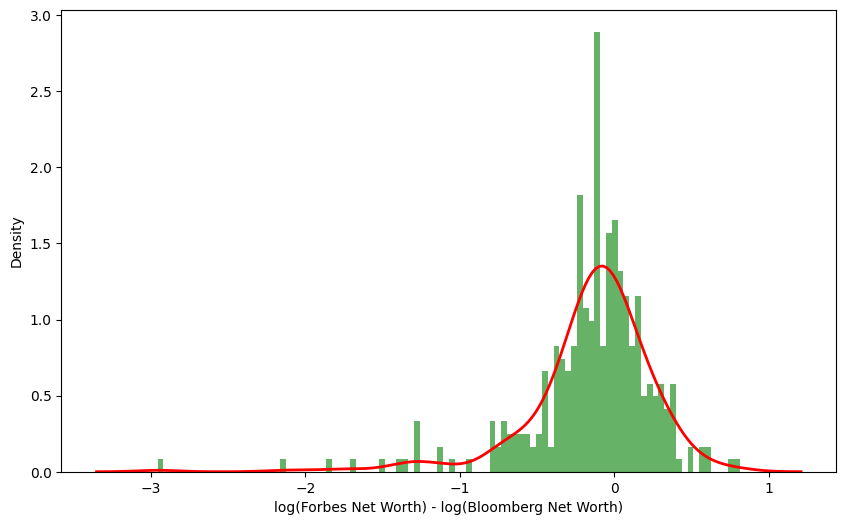

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_merged['log_forbes_minus_log_bloomberg'], bins=100, density=True, alpha=0.6, color='g')

# Create the KDE plot
sns.kdeplot(df_merged['log_forbes_minus_log_bloomberg'], color='r', linewidth=2)

# Add labels
plt.xlabel('log(Forbes Net Worth) - log(Bloomberg Net Worth)')
plt.ylabel('Density')

# Show the plot
plt.show()


In [13]:
df_merged['squared_log_forbes_minus_log_bloomberg'] = df_merged['log_forbes_minus_log_bloomberg']**2

Text(0, 0.5, 'squared log forbes minus log bloomberg')

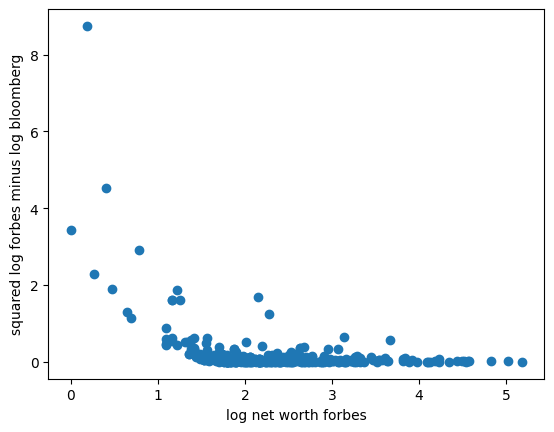

In [14]:
# plot squared differences against log net worth

plt.scatter(df_merged['log_net_worth_forbes'], df_merged['squared_log_forbes_minus_log_bloomberg'])
plt.xlabel('log net worth forbes')
plt.ylabel('squared log forbes minus log bloomberg')

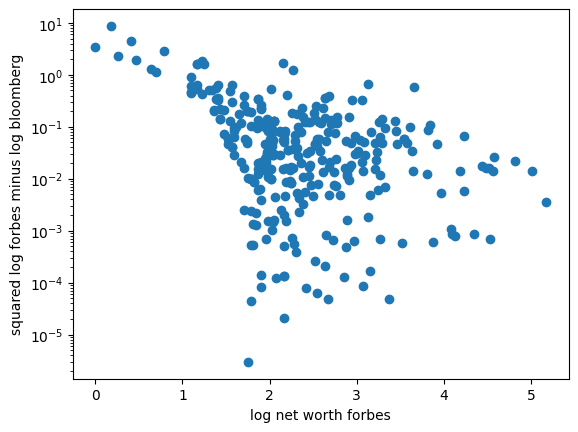

In [15]:
# plot squared differences against log net worth

plt.scatter(df_merged['log_net_worth_forbes'], df_merged['squared_log_forbes_minus_log_bloomberg'])
plt.xlabel('log net worth forbes')
plt.ylabel('squared log forbes minus log bloomberg')
# make the y axis log scale
plt.yscale('log')

In [16]:
df_merged['forbes/bloomberg'] = df_merged['net_worth_forbes'] / df_merged['net_worth_bloomberg']

In [17]:
df_merged['forbes/bloomberg'].describe()

count    321.000000
mean       0.920504
std        0.307957
min        0.051948
25%        0.760000
50%        0.900000
75%        1.072993
max        2.254902
Name: forbes/bloomberg, dtype: float64

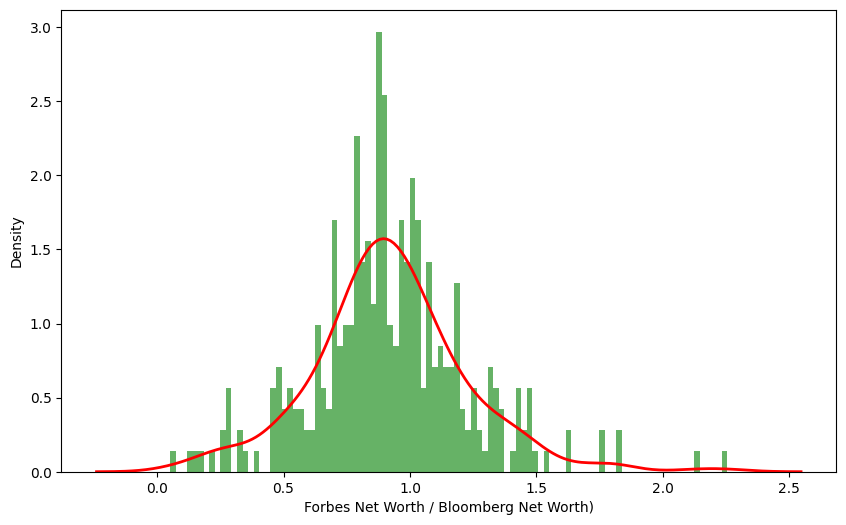

In [18]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_merged['forbes/bloomberg'], bins=100, density=True, alpha=0.6, color='g')

# Create the KDE plot
sns.kdeplot(df_merged['forbes/bloomberg'], color='r', linewidth=2)

# Add labels
plt.xlabel('Forbes Net Worth / Bloomberg Net Worth)')
plt.ylabel('Density')

# Show the plot
plt.show()
